# kNN Regression

## Data Science, Machine Learning and Artificial Intelligence - by Farzad Minooei

### Initial Setup

In [4]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Underlying stochastic process
np.random.seed(123)
x = np.linspace(0, 1, 200)
y = np.sqrt(x) + np.random.normal(0, 0.1, 200)

#Create dataframe to save data
df = pd.DataFrame({'x' : x, 'y' : y})
df.head()

,x,y
0,0.000000,-0.108563
1,0.005025,0.170623
2,0.010050,0.128549
3,0.015075,-0.027848
4,0.020101,0.083916


In [6]:
df.shape

(200, 2)

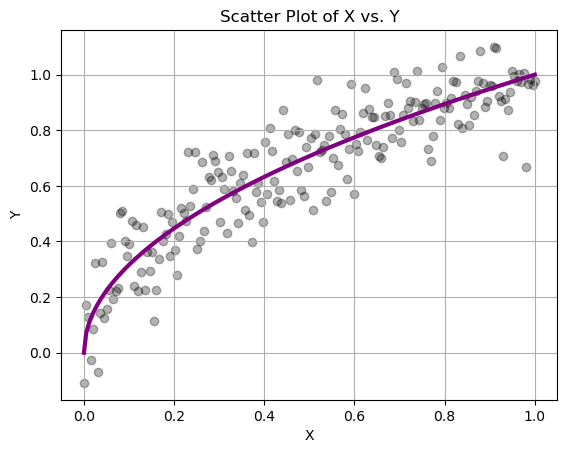

In [7]:
#Scatter plot of x vs. y
plt.scatter(df['x'], df['y'], c = 'black', alpha = 0.3)
plt.plot(df['x'], np.sqrt(df['x']), c = 'purple', linewidth = 3)
plt.title('Scatter Plot of X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

### Data Preparation

In [9]:
#Install sklearn library
#%pip install sklearn
import sklearn
#Get the version of sklearn
print(sklearn.__version__)

1.4.2


In [10]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 123)

In [11]:
train.head(10)

,x,y
24,0.120603,0.221891
150,0.753769,0.893580
114,0.572864,0.858152
33,0.165829,0.337234
23,0.115578,0.457550
171,0.859296,0.919470
41,0.206030,0.281138
100,0.502513,0.773087
152,0.763819,0.732779
71,0.356784,0.514198


In [12]:
#Sort dataframe based on x column
train.sort_values('x', inplace = True)
train.head(10)

,x,y
0,0.000000,-0.108563
1,0.005025,0.170623
2,0.010050,0.128549
3,0.015075,-0.027848
5,0.025126,0.323654
6,0.030151,-0.069028
7,0.035176,0.144661
8,0.040201,0.327096
9,0.045226,0.125990
10,0.050251,0.156279


In [13]:
train.shape

(160, 2)

In [14]:
#Sort dataframe based on x column
test.sort_values('x', inplace = True)
test.head(10)

,x,y
4,0.020101,0.083916
19,0.095477,0.347613
20,0.100503,0.390758
26,0.130653,0.452170
31,0.155779,0.114829
37,0.185930,0.500018
50,0.251256,0.371846
52,0.261307,0.685553
53,0.266332,0.436267
72,0.361809,0.717726


In [15]:
test.shape

(40, 2)

### Build Prediction Model

In [17]:
#Import kNN Regressor
from sklearn.neighbors import KNeighborsRegressor

In [18]:
#Create X_train and y_train
X_train = train['x'].values.reshape(-1, 1)
y_train = train['y'].values.reshape(-1, 1)

In [19]:
X_train[:10, :]

array([[0.        ],
       [0.00502513],
       [0.01005025],
       [0.01507538],
       [0.02512563],
       [0.03015075],
       [0.03517588],
       [0.04020101],
       [0.04522613],
       [0.05025126]])

In [20]:
#Create kNN regression model, k = 3
knn_k3 = KNeighborsRegressor(n_neighbors = 3, 
                             weights = 'uniform',  #all points in each neighborhood are weighted equally
                             algorithm = 'brute',  #algorithm used to compute the nearest neighbors (for small sample)
                             metric = 'minkowski', #standard Euclidean distance when p = 2
                             p = 2,
                             n_jobs = -1)          #if set to -1, all CPUs are used

#Set the number of threads
import os
os.environ['OMP_NUM_THREADS'] = '4'

#Fit the k-nearest neighbors regressor on the train
knn_k3.fit(X_train, y_train)

#Predict the response in the train
train['pred_k3'] = knn_k3.predict(X_train)

train.head(10)

,x,y,pred_k3
0,0.000000,-0.108563,0.063536
1,0.005025,0.170623,0.063536
2,0.010050,0.128549,0.090441
3,0.015075,-0.027848,0.090441
5,0.025126,0.323654,0.133096
6,0.030151,-0.069028,0.133096
7,0.035176,0.144661,0.134243
8,0.040201,0.327096,0.199249
9,0.045226,0.125990,0.203122
10,0.050251,0.156279,0.169303


In [21]:
#kNN Regression Model for k = 5, 10, 25, 50, and 100
k_list = [5, 10, 25, 50, 100]

for k in k_list:
    #Create kNN regression model
    knn = KNeighborsRegressor(n_neighbors = k, 
                              weights = 'uniform', 
                              algorithm = 'brute',
                              metric = 'minkowski',
                              p = 2,
                              n_jobs = -1)

    #Fit the model 
    knn.fit(X_train, y_train)
    
    #Predict the response in the train
    train['pred_k' + str(k)] = knn.predict(X_train)

train.head(10)

,x,y,pred_k3,pred_k5,pred_k10,pred_k25,pred_k50,pred_k100
0,0.000000,-0.108563,0.063536,0.097283,0.117141,0.244848,0.363983,0.504854
1,0.005025,0.170623,0.063536,0.097283,0.117141,0.244848,0.363983,0.504854
2,0.010050,0.128549,0.090441,0.097283,0.117141,0.244848,0.363983,0.504854
3,0.015075,-0.027848,0.090441,0.105190,0.117141,0.244848,0.363983,0.504854
5,0.025126,0.323654,0.133096,0.139707,0.117141,0.244848,0.363983,0.504854
6,0.030151,-0.069028,0.133096,0.170475,0.150561,0.244848,0.363983,0.504854
7,0.035176,0.144661,0.134243,0.170475,0.172969,0.244848,0.363983,0.504854
8,0.040201,0.327096,0.199249,0.137000,0.179285,0.244848,0.363983,0.504854
9,0.045226,0.125990,0.203122,0.195933,0.204153,0.244848,0.363983,0.504854
10,0.050251,0.156279,0.169303,0.245941,0.204153,0.244848,0.363983,0.504854


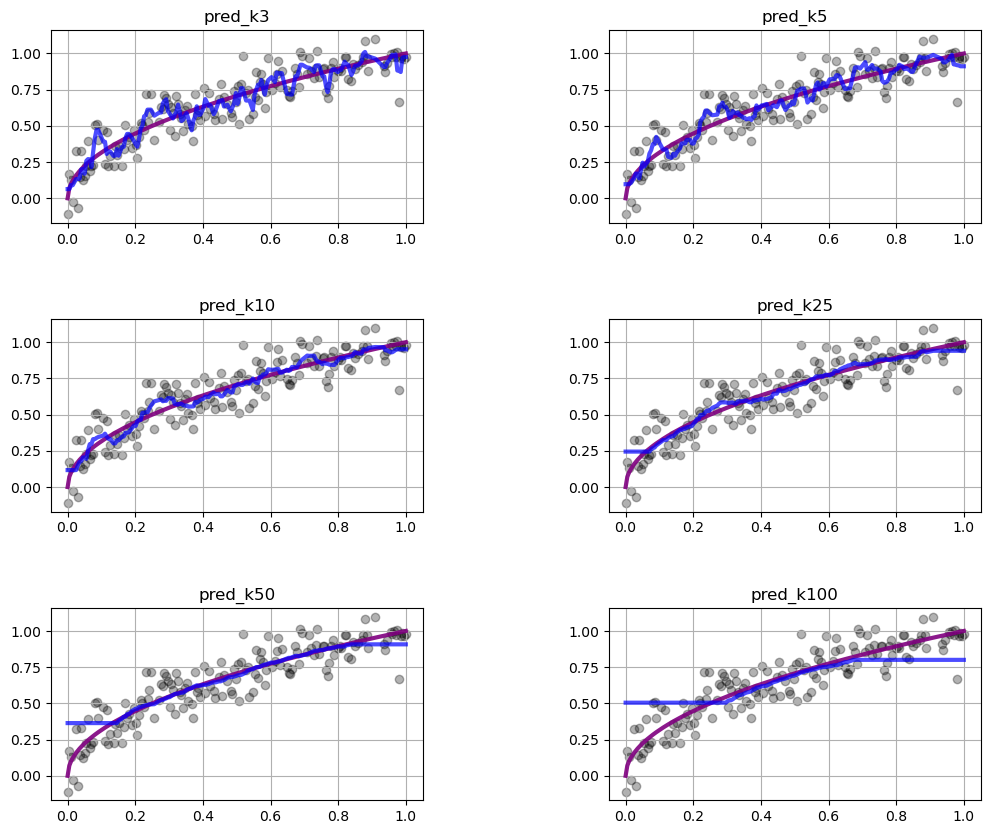

In [22]:
#Visualization of the results
plt.figure(figsize = (12, 10))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 7):
    plt.subplot(3, 2, i)
    plt.scatter(train['x'], train['y'], c = 'black', alpha = 0.3)
    plt.plot(train['x'], np.sqrt(train['x']), c = 'purple', linewidth = 3, alpha = 0.9)
    plt.plot(train['x'], train.iloc[:, i + 1], c = 'blue', linewidth = 3, alpha = 0.7)
    plt.title(train.columns[i + 1])
    plt.grid()

### Model Evaluation

In [24]:
#Model evaluation in the train, k = 3
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#The root mean squared error 
print('RMSE: {:0.3f}'.format(root_mean_squared_error(train['y'], train['pred_k3'])))
#The root mean absolute error 
print('MAE: {:0.3f}'.format(mean_absolute_error(train['y'], train['pred_k3'])))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(train['y'], train['pred_k3']) * 100))

RMSE: 0.080
MAE: 0.063
MAPE: 17.332


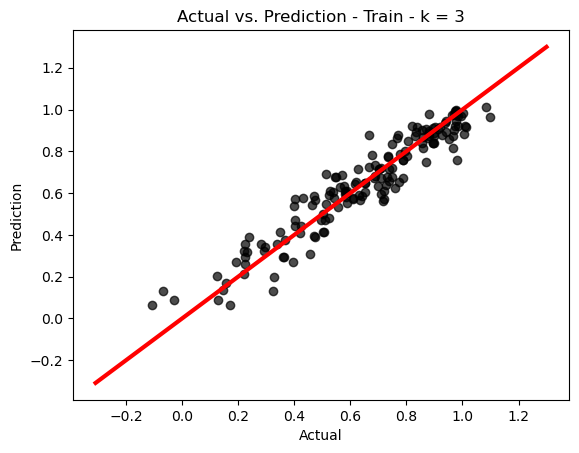

In [25]:
#Plot actual vs. prediction - Train
plt.scatter(train['y'], train['pred_k3'], c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Train - k = 3')
xp = np.linspace(train['y'].min() - 0.2, train['y'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [26]:
#Model evaluation in the test
#Prediction in the test
test['pred_k3'] = knn_k3.predict(test['x'].values.reshape(-1, 1))
test.head()

,x,y,pred_k3
4,0.020101,0.083916,0.075593
19,0.095477,0.347613,0.462013
20,0.100503,0.390758,0.371331
26,0.130653,0.452170,0.246011
31,0.155779,0.114829,0.307931


In [27]:
#Model evaluation in the test, k = 3
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#The root mean squared error 
print('RMSE: {:0.3f}'.format(root_mean_squared_error(test['y'], test['pred_k3'])))
#The root mean absolute error 
print('MAE: {:0.3f}'.format(mean_absolute_error(test['y'], test['pred_k3'])))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(test['y'], test['pred_k3']) * 100))

RMSE: 0.135
MAE: 0.116
MAPE: 20.915


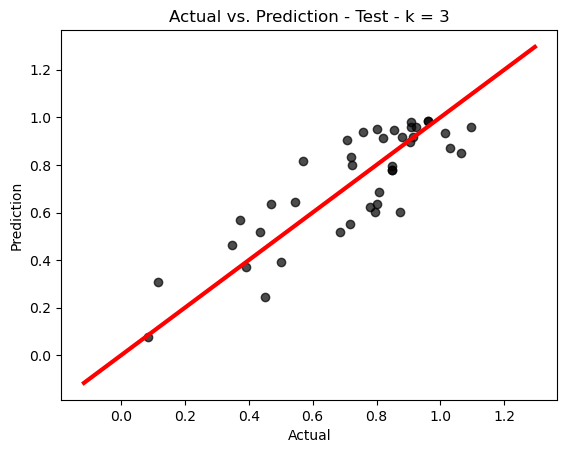

In [28]:
#Plot actual vs. prediction - Test
plt.scatter(test['y'], test['pred_k3'], c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Test - k = 3')
xp = np.linspace(test['y'].min() - 0.2, test['y'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

### Hyperparameter Tuning

In [30]:
#Grid
k_grid = [1] + list(range(5, 101, 5))
k_grid

[1,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

In [31]:
len(k_grid)

21

In [32]:
#An array to save cv results
cv_errors = np.zeros(shape = len(k_grid))
cv_errors

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [33]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

#K-fold cross validation
for i in range(len(k_grid)):
    #Create kNN regression model
    knn = KNeighborsRegressor(n_neighbors = k_grid[i], 
                              weights = 'uniform', 
                              algorithm = 'brute',
                              metric = 'minkowski',
                              p = 2,
                              n_jobs = -1)
    
    #K-fold cross validation
    scores = cross_val_score(estimator = knn, 
                             X = X_train, 
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, 
                             n_jobs = -1)
    #Calculate the average scores and save the results
    cv_errors[i] = scores.mean()

In [34]:
cv_errors

array([-0.15645708, -0.12495769, -0.11697998, -0.11893709, -0.11860594,
       -0.11885396, -0.11973165, -0.12430683, -0.12676141, -0.12952545,
       -0.13246729, -0.13718217, -0.14071639, -0.1453413 , -0.14958209,
       -0.15448813, -0.16005707, -0.16583446, -0.17074027, -0.17459761,
       -0.17970638])

In [35]:
#The best hyperparameter
k_grid[np.argmax(cv_errors)]

10

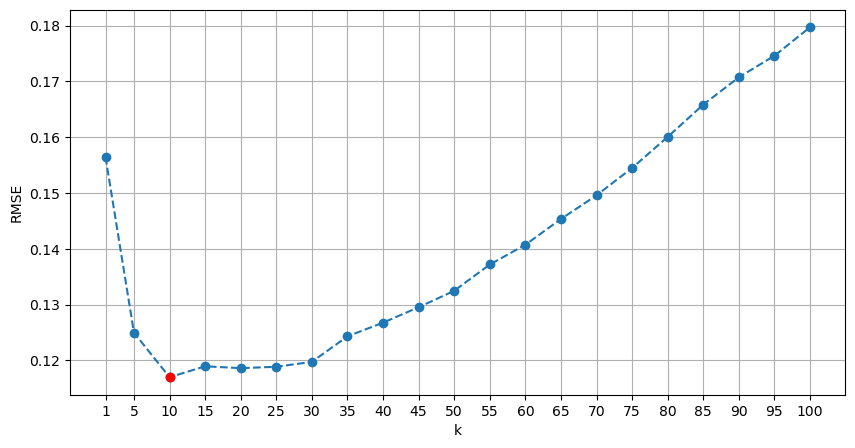

In [36]:
#Plot the results
plt.figure(figsize = (10, 5))
plt.plot(k_grid, -cv_errors, 'o', linestyle = '--')
plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.plot(k_grid[np.argmax(cv_errors)], -np.max(cv_errors), 'ro')
plt.grid()
plt.show()

### Build the Final Model

In [38]:
#Create kNN regression model w/ the best hyperparameter
knn = KNeighborsRegressor(n_neighbors = k_grid[np.argmax(cv_errors)], 
                          weights = 'uniform', 
                          algorithm = 'brute',
                          metric = 'minkowski',
                          p = 2,
                          n_jobs = -1)

#Fit the k-nearest neighbors regressor on the train
knn.fit(X_train, y_train)

#Predict the response in the test
test['pred_k10'] = knn.predict(test['x'].values.reshape(-1, 1))
test.head(10)

,x,y,pred_k3,pred_k10
4,0.020101,0.083916,0.075593,0.117141
19,0.095477,0.347613,0.462013,0.355116
20,0.100503,0.390758,0.371331,0.355116
26,0.130653,0.452170,0.246011,0.315164
31,0.155779,0.114829,0.307931,0.343032
37,0.185930,0.500018,0.392220,0.378415
50,0.251256,0.371846,0.570465,0.571321
52,0.261307,0.685553,0.519634,0.613490
53,0.266332,0.436267,0.519634,0.606632
72,0.361809,0.717726,0.550028,0.558300


In [39]:
#Model evaluation in the test, k = 10
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#The root mean squared error 
print('RMSE: {:0.3f}'.format(root_mean_squared_error(test['y'], test['pred_k10'])))
#The root mean absolute error 
print('MAE: {:0.3f}'.format(mean_absolute_error(test['y'], test['pred_k10'])))
#MAPE
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(test['y'], test['pred_k10']) * 100))

RMSE: 0.124
MAE: 0.101
MAPE: 20.020


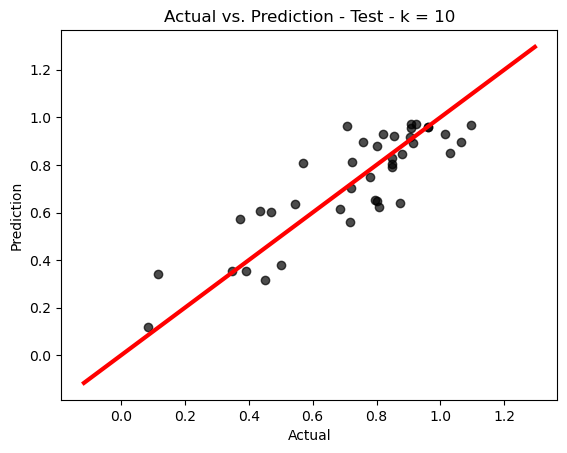

In [40]:
#Plot actual vs. prediction - Test
plt.scatter(test['y'], test['pred_k10'], c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction - Test - k = 10')
xp = np.linspace(test['y'].min() - 0.2, test['y'].max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

# End of Code